# Project 4 -  Predictive Modelling

<br>**Sarbjit Choong
<br>Amir Reza Roshani Moghaddam
<br>Sabina Grossman**

### REQUIREMENTS:

-Use the Bird Species dataset from Kaggle to test image classification skills.
<br>-Assure that Training, Testing and Validation sets contain the same classes of species.
<br>-The validation set is to be used at the very end.
<br>-Expected to compile a CNN in order to correctly classify your selected 15 classes.
<br>-Save the model and evaluate its performance on the validation set during class presentation.

### DATA

From the "Birds" dataset, we have chosen the last 25 classes for our image classifications.

### LIBRARIES IMPORTED:

In [ ]:

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from functions.visuals import plotting
from functions.data_score import score
from functions.prediction_visuals import prediction_visuals

### DEFINING VARIABLES:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

train_dir = "/Users/sarbjitmadra/Desktop/ds-predictive-modelling-project-4-group5-sab-amir-sarb/birds/train/train_birds"
test_dir = "/Users/sarbjitmadra/Desktop/ds-predictive-modelling-project-4-group5-sab-amir-sarb/birds/test/test_birds"
valid_dir= "/Users/sarbjitmadra/Desktop/ds-predictive-modelling-project-4-group5-sab-amir-sarb/birds/valid/valid_birds"


In [ ]:
#Getting train dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=None,
  subset= None,
  seed= None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
#Getting dataset for validation

val_ds = tf.keras.utils.image_dataset_from_directory(
  valid_dir,
  validation_split=None ,
  subset= None,
  seed=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
#Getting dataset for testing later

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=None,
  subset=None,
  seed=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

### CLASS NAMES: 

In [6]:
#Identifying all the classes of birds that will be used for the image classification


class_names = train_ds.class_names
print(class_names)

['UMBRELLA BIRD', 'VARIED THRUSH', 'VEERY', 'VENEZUELIAN TROUPIAL', 'VERMILION FLYCATHER', 'VICTORIA CROWNED PIGEON', 'VIOLET GREEN SWALLOW', 'VIOLET TURACO', 'VULTURINE GUINEAFOWL', 'WALL CREAPER', 'WATTLED CURASSOW', 'WATTLED LAPWING', 'WHIMBREL', 'WHITE BROWED CRAKE', 'WHITE CHEEKED TURACO', 'WHITE CRESTED HORNBILL', 'WHITE NECKED RAVEN', 'WHITE TAILED TROPIC', 'WHITE THROATED BEE EATER', 'WILD TURKEY', 'WILSONS BIRD OF PARADISE', 'WOOD DUCK', 'YELLOW BELLIED FLOWERPECKER', 'YELLOW CACIQUE', 'YELLOW HEADED BLACKBIRD']


### DATA VISUALIZATION

SAMPLE PHOTO: WALL CREAPER


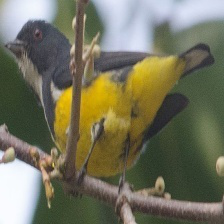

In [7]:
#Visualizing one random photo from the train dataset.

image = "/Users/sarbjitmadra/Desktop/ds-predictive-modelling-project-4-group5-sab-amir-sarb/birds/train/train_birds/YELLOW BELLIED FLOWERPECKER/002.jpg"
print('\033[1m' + 'SAMPLE PHOTO: WALL CREAPER' + '\033[0m')
PIL.Image.open(image)

                         MORE SAMPLES                         


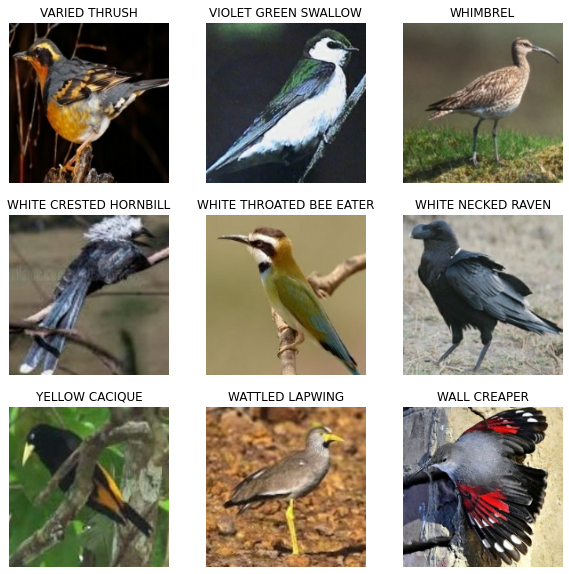

In [8]:
#Visualizing more photos from the training dataset.


S= '\033[1m' + 'MORE SAMPLES' + '\033[0m'

S = S.center(70)
print(S)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
#Manually iterating over the dataset and fetch batches of images

# This is a image batch is 32 images of shape 180x180. The 3 is the  color channels RGB.
# The label_batch is corresponding labels to the 32 images.

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


### MODEL TRAINING:

In [10]:
#The Keras Sequential model has three convolution blocks consisting of a max pooling layer in all of them. 
#The Dense layer has 128 units of fully connected layer with 128 units on top of it that 
#   is worked upon by a ReLU activation function. 


number = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number)
])

In [11]:
#For optimizer -- "Adam" is used to accelerate the gradient descent by looking at exponential weighted 
#     average of the gradients.
#For loss function -- "SparseCategoricalCrossentropy" computes the loss between labels and predictions.

model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [12]:
#Tells the number of parameters that are trained for each layers.
#Uncomment to see.


# model.summary()

In [13]:
#Fitting the train data and the validation data that will
#"epochs" - defines the number of iterations the learning algorithm will work on the training dataset.

history =model.fit(train_ds,validation_data=val_ds,epochs=1)

128/128 [==============================] - 40s 304ms/step - loss: 2.3596 - accuracy: 0.3287 - val_loss: 1.2937 - val_accuracy: 0.6640


### CHECKING:

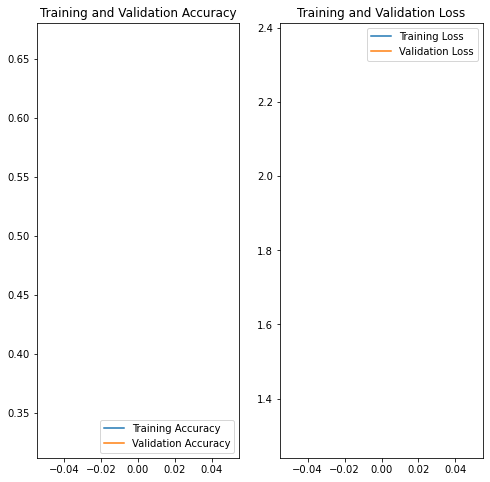

In [14]:
#Ploting of the loss and accuracy on the training and validation sets

plotting(history, 1)

In [15]:
#Evaluating the performance of the model on train dataset

score(train_ds, model, 1) 

128/128 [==============================] - 12s 95ms/step - loss: 1.5272 - accuracy: 0.5423
Loss: 1.5272046327590942 
 Accuracy: 0.5423105359077454


In [16]:
#Evaluating the performance of the model on test dataset

score(test_ds, model, 1)

4/4 [==============================] - 0s 82ms/step - loss: 1.5785 - accuracy: 0.5360
Loss: 1.5785009860992432 
 Accuracy: 0.5360000133514404


In [17]:
#Evaluating the performance of the model on validation dataset

score(val_ds, model, 1)

4/4 [==============================] - 1s 84ms/step - loss: 1.2937 - accuracy: 0.6640
Loss: 1.2936638593673706 
 Accuracy: 0.6639999747276306


### MODEL 2: 

#### Adding dropout and data augmentation to reduce the overfitting problem existed in the first model.

### DATA AUGMENTATION:

In [18]:
#Data Augmentation - modifies the data by adding more data of itself.


data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### MODEL 2 TRAINING:

In [19]:
model_2 = Sequential([
  data_augmentation,
  
  layers.Rescaling(1./255, input_shape=(img_size, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(25, activation = 'softmax')
])


#added dropout = 0.2

In [20]:
model_2.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
#Fitting the new model with train and validation dateset with 10 epochs.


history2 =model_2.fit(train_ds,validation_data=val_ds,epochs=1)

/Users/sarbjitmadra/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 95/128 [=====================>........] - ETA: 11s - loss: 3.0145 - accuracy: 0.1227

### MODEL 2 CHECKING:

In [ ]:
#Ploting of the loss and accuracy on the new training and validation sets 

plotting(history2, 1)

In [ ]:
#Evaluating the performance of the model on train dataset

score(train_ds, model_2, 1)

In [ ]:
#Evaluating the performance of the model on test dataset

score(test_ds, model_2, 1)

In [ ]:
#Evaluating the performance of the model on validation dataset

score(val_ds, model_2, 1)

### CONCLUSION:

In the first model we got an accuracy of approximately 71% on the unseen data. However, we faced overfitting as there was a gap between the performance of the model on the train and test data. To remove this issue, therfore, we included the dropout and data augmentation in the model 2. Doing this could increase the accuracy by about 10%, and removed the overfitting problem. If we had more time, we could probably increase the accuracy by modifying the number of hidden layers, units in each layer, epochs and dropout proportion.

### IMAGE PREDICTION:

In [ ]:
#Importing a photo from test dataset

image = "/Users/sarbjitmadra/Desktop/ds-predictive-modelling-project-4-group5-sab-amir-sarb/birds/test/test_birds/VEERY/2.jpg"

In [ ]:
#Predicting unseen photo using the new model (model_2)
# Can also use first model ("model") to see the difference.

prediction_visuals(image, model_2, img_height, img_width, class_names)

### MORE PREDICTIONS:

In [ ]:
image = "/Users/sarbjitmadra/Desktop/ds-predictive-modelling-project-4-group5-sab-amir-sarb/birds/test/test_birds/WILSONS BIRD OF PARADISE/2.jpg"
prediction_visuals(image, model_2, img_height, img_width, class_names)

In [ ]:
image = "/Users/sarbjitmadra/Desktop/ds-predictive-modelling-project-4-group5-sab-amir-sarb/birds/test/test_birds/VIOLET TURACO/4.jpg"
prediction_visuals(image, model_2, img_height, img_width, class_names)

In [ ]:
image = "/Users/sarbjitmadra/Desktop/ds-predictive-modelling-project-4-group5-sab-amir-sarb/birds/test/test_birds/WHITE BROWED CRAKE/1.jpg"
prediction_visuals(image, model_2, img_height, img_width, class_names)

### CONVERTING THE MODELS:

In [ ]:
#First model with overfitting

model.save("model.h5")

In [ ]:
#Best model

model.save("model_2.h5")